In [1]:
import numpy as np
from astropy.table import Table,vstack,join, Column
%matplotlib inline
import matplotlib.pyplot as plt
import os
parentdir = os.path.abspath("..")
os.sys.path.insert(0,parentdir) 
from astropy.table import Table

plt.rc('font', family='serif', size=14)
plt.rc('xtick.major', size=4, pad=7)
plt.rc('xtick', labelsize=14)
plt.rc('ytick.major', size=4, pad=7)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=15)
plt.rc('legend',**{'fontsize':14})
plt.rc('savefig', bbox='tight')
plt.rc('figure.subplot', wspace=0.5)
plt.rc('figure.subplot', hspace=0.5)
plt.rc('legend', fancybox=True, borderaxespad=0.)

In [2]:
def get_plt_rng(arr):
    return np.percentile(arr,5), np.percentile(arr,95)

In [3]:
aeg_cg_bias_cat = Table.read(parentdir + '/results/final_AEGIS_cg_bias_only2.fits', format='fits')
# Plots to be saved at
plot_path = parentdir + '/plots/'

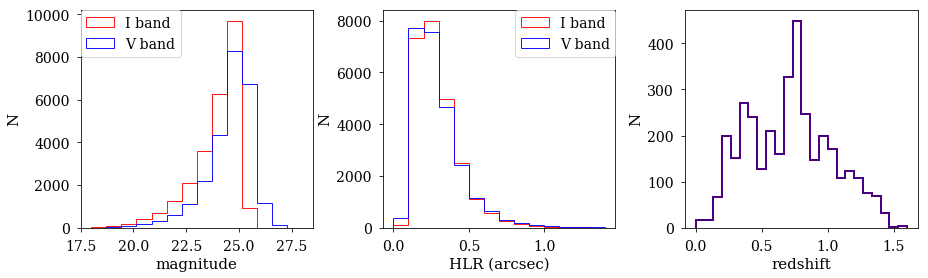

In [4]:
## Plot AEGIS galaxy properties 
plt.figure(1,figsize=[15,4])
plt.subplots_adjust(wspace = 0.3)
plt.subplots_adjust(hspace = 0.3)
plt.subplot(1,3,1)

plt.hist(aeg_cg_bias_cat['MAG_2'],np.linspace(18,28,15),histtype='step', alpha=0.9,rwidth=0.9,
         color='red', label='I band')
plt.hist(aeg_cg_bias_cat['MAG_1'],np.linspace(18,28,15),histtype='step', alpha=0.9,rwidth=0.9,
         color='blue', label='V band')
plt.xlabel('magnitude')
plt.ylabel('N')
plt.legend(loc=2)
#plt.title('Histogram of magnitudes')

plt.subplot(1,3,2)
x = aeg_cg_bias_cat['FLUX_RADIUS_1']
y = aeg_cg_bias_cat['FLUX_RADIUS_2']
plt.hist(y*0.03, np.linspace(0, 1.4,15),
         alpha=0.9, color='red', label='I band',histtype='step',rwidth=0.9,)
plt.hist(x*0.03, np.linspace(0,1.4,15),
         alpha=0.9, color='blue', label='V band', histtype='step',rwidth=0.9,)
plt.xlabel('HLR (arcsec)')
plt.ylabel('N')
plt.legend(loc=1)
#plt.title('Histogram of measured HLR')

plt.subplot(1,3,3)
plt.hist(aeg_cg_bias_cat['zphot_1'], np.linspace(0,1.6,25),
         alpha=1, color='indigo',histtype='step', linewidth=2)
plt.xlabel('redshift')
plt.ylabel('N')
#plt.title('Histogram of spectroscopic redshifts')


plt.savefig(plot_path + "aegis_gal.png", 
             bbox_inches='tight')

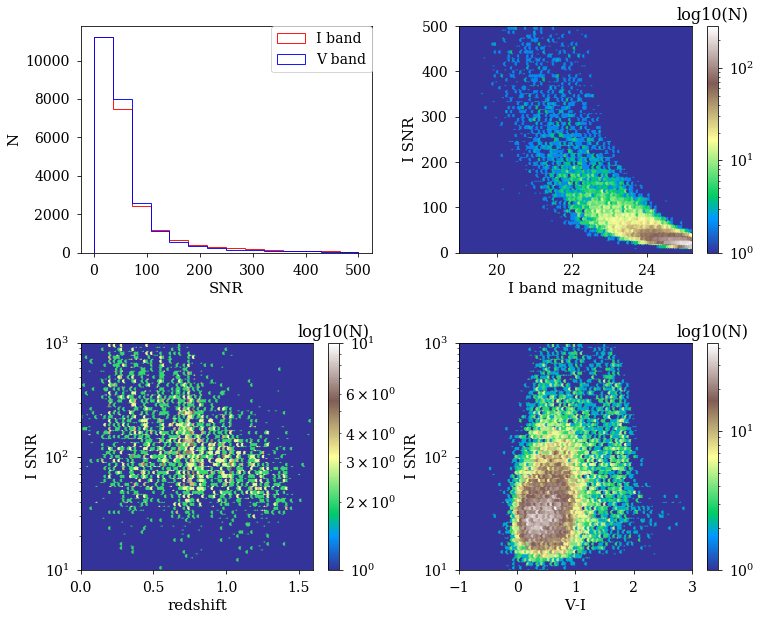

In [5]:
## Plot AEGIS noise properties 
plt.figure(1,figsize=[12,10])
plt.subplots_adjust(wspace = 0.3)
plt.subplots_adjust(hspace = 0.4)
plt.subplot(2,2,1)
plt.hist(aeg_cg_bias_cat['sn_ellip_gauss_2'],np.linspace(0,500,15), alpha=0.9,histtype='step',rwidth=0.9,
         color='red', label='I band')
plt.hist(aeg_cg_bias_cat['sn_ellip_gauss_1'],np.linspace(0,500,15), alpha=0.9,histtype='step',rwidth=0.9,
         color='blue', label='V band')

plt.xlabel('SNR')
plt.ylabel('N')
plt.legend(loc=1)
#plt.title('Histogram of SNR')

plt.subplot(2,2,2)
x = aeg_cg_bias_cat['MAG_2']
y = aeg_cg_bias_cat['sn_ellip_gauss_2']
xmin, xmax = 19,25.2 #get_plt_rng(x)
ymin, ymax = 0,500 #get_plt_rng(y)
#plt.xticks(())
plt.hexbin(x,y, bins='log',
           extent=(xmin,xmax,ymin,ymax), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.xlabel('I band magnitude')
plt.ylabel('I SNR')
#plt.title('I band mag vs SNR')
plt.ylim([ymin, ymax])
plt.xlim([xmin, xmax])

plt.subplot(2,2,3)
q, = np.where((aeg_cg_bias_cat['sn_ellip_gauss_2']>0) & (aeg_cg_bias_cat['zphot_2']>0) )
x = aeg_cg_bias_cat['zphot_2'][q]
y = aeg_cg_bias_cat['sn_ellip_gauss_2'][q]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
#plt.xticks(())
plt.hexbin(x,y, bins='log', yscale='log',
           extent=(0,1.6,1,3), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.xlabel('redshift')
plt.ylabel('I SNR')
#plt.title('redshift vs I band SNR')
plt.ylim([10,1000])
plt.xlim([0,1.6])


plt.subplot(2,2,4)
q, = np.where(aeg_cg_bias_cat['sn_ellip_gauss_2']>0)
x = aeg_cg_bias_cat['MAG_1'][q] - aeg_cg_bias_cat['MAG_2'][q]
y = aeg_cg_bias_cat['sn_ellip_gauss_2'][q]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
#plt.xticks(())
plt.hexbin(x,y, bins='log', yscale='log',
           extent =(-1,3,1,3),cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.xlabel('V-I')
plt.ylabel('I SNR')
# plt.title('color vs I band SNR')
plt.ylim([10,1000])
plt.xlim([-1,3])

plt.savefig(plot_path + "aegis_snr.png", 
            bbox_inches='tight')

all galaxies m_CRG = -0.0036564788523394008 +- 0.00150889920452172
4379 galaxies with I SNR > 100
galaxies with I SNR>100 m_CRG = -0.0005060737367263278 +- 0.00019482555560298688


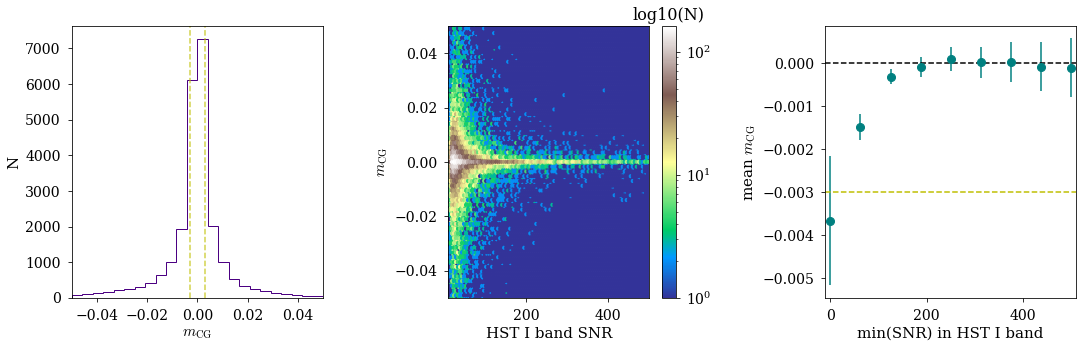

In [6]:
plt.figure(1,figsize=[18,5])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.3)
plt.subplot(1,3,1)
plt.hist(aeg_cg_bias_cat['m_CRG_1'].T[2], np.linspace(-0.05,0.05,25),
         color='indigo',histtype='step',rwidth=0.7)
plt.xlim([-0.05,0.05])
plt.axvline(0.003, linestyle= '--', c='y', alpha=.7)
plt.axvline(-0.003, linestyle= '--', c='y', alpha=.7)
plt.xlabel(r'$m_{\rm CG}$')
plt.ylabel('N')
# plt.title('m_cg of AEGIS galaxies',size=15)


plt.subplot(1,3,2)
x = aeg_cg_bias_cat['sn_ellip_gauss_2']
y = aeg_cg_bias_cat['m_CRG_1'].T[2]
ymin, ymax = -0.05,0.05 #get_plt_rng(x)
xmin, xmax = 10,500 #get_plt_rng(y)
#plt.xticks(())
plt.hexbin(x,y, bins='log',
           extent=(xmin,xmax,ymin,ymax), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.ylabel(r'$m_{\rm CG}$')
plt.xlabel('HST I band SNR')
# plt.title('m_CG vs SNR')
plt.ylim([ymin, ymax])
plt.xlim([xmin, xmax])


plt.subplot(1,3,3)
snrs = np.linspace(0, 500,9)
mean_m_CRG, mean_m_CRG_err = [],[]
diff1,diff2=[],[]
for s in snrs:
    q,= np.where(aeg_cg_bias_cat['sn_ellip_gauss_2']>s)
    c = aeg_cg_bias_cat['m_CRG_1'][q].T[2]
    mean_m_CRG.append(np.mean(c))
    mean_m_CRG_err.append(np.std(c)/len(q)**0.5)

plt.errorbar(snrs, mean_m_CRG, yerr=mean_m_CRG_err, marker='o',markersize=8,
             linestyle='', color='teal')
plt.axhline(0, linestyle='--', c='k')
plt.xlabel('min(SNR) in HST I band')
plt.ylabel(r'mean $m_{\rm CG}$')
plt.xlim([-11, 511])
# plt.title('Mean CG bias for SNR > min(SNR) in HST I band')
plt.axhline(-0.003, linestyle='--', c='y')

plt.savefig(plot_path + "aeg_mcg_results.png", 
             bbox_inches='tight')


mean = np.mean(aeg_cg_bias_cat['m_CRG_1'].T[2])
err = np.std(aeg_cg_bias_cat['m_CRG_1'].T[2])/len(aeg_cg_bias_cat['m_CRG_1'].T[2])**0.5
print("all galaxies m_CRG = {0} +- {1}".format(mean, err))

q, = np.where(aeg_cg_bias_cat['sn_ellip_gauss_2'] > 100)
print(len(q), "galaxies with I SNR > 100")
mean = np.mean(aeg_cg_bias_cat['m_CRG_1'][q].T[2])
err = np.std(aeg_cg_bias_cat['m_CRG_1'][q].T[2])/len(aeg_cg_bias_cat['m_CRG_1'][q].T[2])**0.5
print("galaxies with I SNR>100 m_CRG = {0} +- {1}".format(mean, err))

Results for galaxies with I band SNR>100


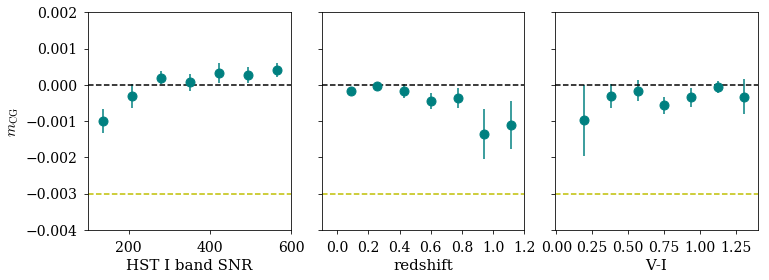

In [7]:

print ("Results for galaxies with I band SNR>100")
q, = np.where(aeg_cg_bias_cat['sn_ellip_gauss_2']>100)
fig, ax = plt.subplots(1, 3, sharey=True, figsize=[12,4])
fig.subplots_adjust(wspace = 0.15)
fig.subplots_adjust(hspace = 0.15)

i=2

in_bins = np.linspace(100, 600,8)
d = np.digitize(aeg_cg_bias_cat['sn_ellip_gauss_2'][q], in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
ax[0].errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='',markersize=9)
ax[0].set_xlabel('HST I band SNR')
ax[0].set_ylabel(r'$m_{\rm CG}$')
ax[0].axhline(0, linestyle='--', c='k')
#plt.title('m_cg binned in I band SNR')
ax[0].set_xlim([100,600])
ax[0].set_ylim([-0.004,0.002])

plt.locator_params(tight=True, nbins=6)
ax[0].axhline(-0.003, linestyle='--', c='y')
ax[0].axhline(0.003, linestyle='--', c='y')


in_bins = np.linspace(0, 1.2,8)
d = np.digitize(aeg_cg_bias_cat['zphot_1'][q], in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
ax[1].errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='',markersize=9)
ax[1].set_xlabel('redshift')
#plt.ylabel(r'$m_{\rm CG}$',size=18)
ax[1].axhline(0, linestyle='--', c='k')
#plt.title('m_cg binned in redshift')
ax[1].set_xlim([-0.1,1.2])
ax[1].set_ylim([-0.004,0.002])
ax[1].locator_params(axis='y',tight=True, nbins=6)
ax[1].locator_params(axis='x',tight=True, nbins=11)
ax[1].axhline(-0.003, linestyle='--', c='y')
ax[1].axhline(0.003, linestyle='--', c='y')


in_bins = np.linspace(0.1, 1.4,8)
x_in = aeg_cg_bias_cat['MAG_1'][q]- aeg_cg_bias_cat['MAG_2'][q]
d = np.digitize(x_in, in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
ax[2].errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='',markersize=9)
ax[2].axhline(0, linestyle='--', c='k')
ax[2].set_xlabel('V-I')
#plt.ylabel(r'$m_{\rm CG}$',size=18)
#plt.title('m_cg binned in color')
ax[2].set_ylim([-0.004,0.002])
ax[2].set_xlim([-0.01,1.4])
ax[2].locator_params(axis='y',tight=True, nbins=6)
ax[2].locator_params(axis='x',tight=True, nbins=7)
ax[2].axhline(-0.003, linestyle='--', c='y')
ax[2].axhline(0.003, linestyle='--', c='y')

plt.savefig(plot_path + "aeg_mcg_bin.png", 
            bbox_inches='tight')

## I band results

In [8]:
i_cat1 = Table.read(parentdir + '/results/final_AEGIS_cg_bias_i_band.fits', format='fits')
r_cat1 = Table.read(parentdir +'/results/final_AEGIS_cg_bias_only2.fits', format='fits')
comb = np.intersect1d(np.array(i_cat1['IDENT_1']), np.array(r_cat1['IDENT_1']))
i_indices = [np.where(np.array(i_cat1["IDENT_1"])  == c)[0][0] for c in comb]
r_indices = [np.where(np.array(r_cat1["IDENT_1"])  == c)[0][0] for c in comb]
i_cat = i_cat1[i_indices]
r_cat = r_cat1[r_indices]

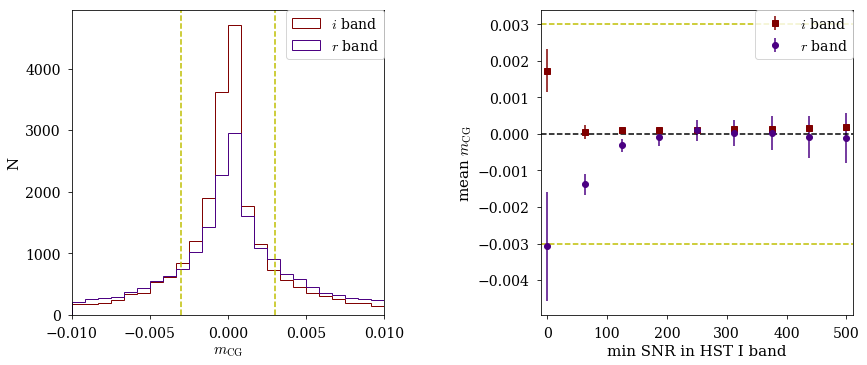

In [9]:
snrs = np.linspace(0, 500,9)
plt.figure(1,figsize=[14,14])
plt.subplot(2,2,1)
plt.hist(i_cat['m_CRG_1_i'].T[2],np.linspace(-0.01,0.01,25), alpha=0.99,
         color='maroon', label=r'$i$ band', histtype='step')
plt.hist(r_cat['m_CRG_1'].T[2], np.linspace(-0.01,0.01,25), alpha=0.99,
         color='indigo', label=r'$r$ band', histtype='step')
plt.xlim([-0.01,0.01])
plt.xlabel(r'$m_{\rm CG}$')
plt.ylabel("N")
plt.axvline(-0.003, linestyle='--', c='y')
plt.axvline(0.003, linestyle='--', c='y')
#plt.title('Histogram of m_cg in i band')
plt.locator_params(tight=True, nbins=6, axis='x')
plt.legend(loc=1)

plt.subplot(2,2,2)
mean_m_CRG_i, mean_m_CRG_r = [],[]
mean_m_CRG_err_i, mean_m_CRG_err_r = [],[]
for s in snrs:
    q,= np.where(r_cat['sn_ellip_gauss_2']>s)
    c1 = r_cat['m_CRG_1'][q].T[2]
    c2 = i_cat['m_CRG_1_i'][q].T[2]
    mean_m_CRG_r.append(np.mean(c1))
    mean_m_CRG_i.append(np.mean(c2))
    mean_m_CRG_err_r.append(np.std(c1)/len(q)**0.5)
    mean_m_CRG_err_i.append(np.std(c2)/len(q)**0.5)

plt.axhline(0, linestyle='--', c='k')    
plt.errorbar(snrs, mean_m_CRG_i, yerr=mean_m_CRG_err_i, marker='s',linestyle='',
             c='maroon', label=r'$i$ band')
plt.errorbar(snrs, mean_m_CRG_r, yerr=mean_m_CRG_err_r, marker='o',linestyle='',
             c='indigo', label=r'$r$ band')

plt.axhline(-0.003, linestyle='--', c='y')
plt.axhline(0.003, linestyle='--', c='y')
plt.xlabel('min SNR in HST I band')
plt.xlim([-11, 511])
plt.ylabel(r'mean $m_{\rm CG}$')

#plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.legend(loc=1)
#plt.title('m_cg AEGIS ')
plt.savefig(plot_path + "aeg_mcg_i_r.png", 
             bbox_inches='tight')